In [4]:
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr

sys.path.append(os.path.join(os.path.expanduser('~'), 'Projects', 'TATSSI'))

# TATSSI Time Series Generator
from TATSSI.time_series.generator import Generator
# Notebook helpers
from TATSSI.notebooks.helpers.plot_time_series import PlotTimeSeries
# Catalogue
from TATSSI.qa.EOS.catalogue import Catalogue

from beakerx import TableDisplay
from IPython.display import display, clear_output
from ipywidgets import Select, SelectMultiple
from ipywidgets import Button, HBox, VBox, HTML
from ipywidgets import Layout

# Set data directory
DataDir = '/home/glopez/Projects/TATSSI/data/MOD13A2.006'
# Set product, it must match product name in TATSSI catalogue
product, version = 'MOD13A2', '006'
product_and_version = f'{product}.{version}'

# Create the time series generator object
tsg = Generator(source_dir = DataDir, product = product_and_version)

# Load time series data!
ts = tsg.load_time_series()

In [8]:
catalogue = Catalogue()
qa_defs = catalogue.get_qa_definition(product=product, version=version)

decimals_list = []
for qa_value in qa_defs[1].Value:
    decimals_list.append(int(bin(qa_value)[2:]))

qa_defs[1]['Value'] = decimals_list

In [11]:
qa_defs[1]

,ProductAndVersion,QualityLayer,Name,Value,Description,Acceptable,Length
0,MOD13A2.006,_1_km_16_days_VI_Quality,MODLAND,0,"VI produced, good quality",True,2
1,MOD13A2.006,_1_km_16_days_VI_Quality,MODLAND,1,"VI produced, but check other QA",False,2
2,MOD13A2.006,_1_km_16_days_VI_Quality,MODLAND,2,"Pixel produced, but most probably cloudy",False,2
3,MOD13A2.006,_1_km_16_days_VI_Quality,MODLAND,3,Pixel not produced due to other reasons than c...,False,2
4,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,0,Highest quality,None,4
5,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,1,Lower quality,None,4
6,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,2,Decreasing quality (0010),None,4
7,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,3,Decreasing quality (0011),None,4
8,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,4,Decreasing quality (0100),None,4
9,MOD13A2.006,_1_km_16_days_VI_Quality,VI Usefulness,5,Decreasing quality (0101),None,4


In [7]:
qa_def = qa_defs[1]
qa_flags = qa_def.Name.unique()
qa_layer = qa_def.QualityLayer.unique()

qa_layer_header = HTML(
    value = f"<b>{qa_layer[0]}</b>",
    description='QA layer:'
)
display(qa_layer_header)

global user_qa_selection
user_qa_selection = dict((element, '') for element in qa_flags)
# Fill default selection
for i, selection in enumerate(user_qa_selection):
    user_qa_selection[selection] = tuple([qa_def[qa_def.Name == selection].Description.tolist()[0]])

qa_flag = Select(
    options=qa_flags,
    value=qa_flags[0],
    rows=len(qa_flags),
    description='QA Parameter name:',
    style = {'description_width': 'initial'},
    layout={'width': '350px'},
    disabled=False
)

def on_qa_flag_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        qa_flag_value = change.owner.value
        
        # Get user selection before changing qa description
        tmp_selection = user_qa_selection[qa_flag_value]

        _options = qa_def[qa_def.Name == qa_flag_value].Description.tolist()
        qa_description.options = _options
        
        qa_description.rows = len(_options)
        qa_description.value = tmp_selection
    
qa_flag.observe(on_qa_flag_change)

qa_description = SelectMultiple(
    options=tuple(qa_def[qa_def.Name == qa_flag.value].Description.tolist()),
    value=tuple([qa_def[qa_def.Name == qa_flag.value].Description.tolist()[0]]),
    rows=len(qa_def[qa_def.Name == qa_flag.value].Description.tolist()),
    description='Description',
    disabled=False,
    style = {'description_width': 'initial'},
    layout={'width': '400px'}
)

def on_qa_description_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        user_qa_selection[qa_flag.value] = qa_description.value

qa_description.observe(on_qa_description_change)

def select_all_qa(b):
    for i, selection in enumerate(user_qa_selection):
        user_qa_selection[selection] = tuple(qa_def[qa_def.Name == selection].Description.tolist())
    
    qa_flag.value = qa_flags[0]
    qa_description.value = user_qa_selection[qa_flags[0]]

# Select all button
select_all = Button(
    description = 'Select ALL',
    layout={'width': '20%'}
)

select_all.on_click(select_all_qa)

# Default selection
select_default = Button(
    description = 'Default selection',
    layout={'width': '20%'}
)

def select_default_qa(b):
    # Fill default selection
    for i, selection in enumerate(user_qa_selection):
        user_qa_selection[selection] = tuple([qa_def[qa_def.Name == selection].Description.tolist()[0]])
    
    qa_flag.value = qa_flags[0]
    qa_description.value = user_qa_selection[qa_flags[0]]

select_default.on_click(select_default_qa)


left_box = VBox([qa_flag])
right_box = VBox([qa_description])
HBox(
    [qa_flag, right_box, select_all, select_default],
    layout={'height': '350px',
            'width' : '99%'}
)
#display(select_all)

#display(HBox)
#idgetLink = widgets.jslink((qa_layer, 'value'), (floatSlider, 'value'))

HTML(value='<b>_1_km_16_days_VI_Quality</b>', description='QA layer:')

In [55]:
user_qa_selection

{'Adjacent cloud detected': ('No', 'Yes'),
 'Aerosol Quantity': ('Climatology', 'Low', 'Average', 'High'),
 'Atmosphere BRDF Correction': ('No', 'Yes'),
 'Land/Water Mask': ('Land (Nothing else but land)',),
 'MODLAND': ('VI produced, good quality', 'VI produced, but check other QA'),
 'Mixed Clouds': ('No',),
 'Possible shadow': ('No',),
 'Possible snow/ice': ('No', 'Yes'),
 'VI Usefulness': ('Highest quality',
  'Lower quality',
  'Decreasing quality (0010)',
  'Decreasing quality (0011)',
  'Decreasing quality (0100)',
  'Decreasing quality (0101)',
  'Decreasing quality (0110)',
  'Decreasing quality (0111)',
  'Decreasing quality (1000)',
  'Decreasing quality (1001)',
  'Decreasing quality (1010)',
  'Decreasing quality (1011)',
  'Lowest quality',
  'Quality so low that it is not useful',
  'L1B data faulty',
  'Not useful for any other reason/not processed')}

In [56]:
# TODO extract first variable to get dimensions
# Create QA mask
# n_qa_layers x time x lat x lon
n_qa_layers = len(user_qa_selection)
_time, _latitude, _longitude = ts.data.data_vars['_1_km_16_days_EVI'].shape
mask = np.zeros((n_qa_layers, _time, _latitude, _longitude), np.int8)

# QA layer user to create mask
_qa_layer = getattr(ts.qa, f"qa{qa_layer[0]}")

for i, user_qa in enumerate(user_qa_selection):
    print("- ", user_qa)
    user_qa_fieldname = user_qa.replace(" ", "_").replace("/", "_")
    
    for j, qa_value in enumerate(user_qa_selection[user_qa]):
        qa_value_field_name = qa_value.replace(" ", "_")
        
        qa_flag_val = qa_def[(qa_def.Name == user_qa) & (qa_def.Description == qa_value)].Value.iloc[0]
        print("  - ", qa_value, qa_flag_val)
        
        if j == 0 :
            mask[i] = (_qa_layer[user_qa_fieldname] == qa_flag_val)
        else:
            mask[i] = np.logical_or(mask[i], _qa_layer[user_qa_fieldname] == qa_flag_val)

-  MODLAND
  -  VI produced, good quality 0
  -  VI produced, but check other QA 1
-  VI Usefulness
  -  Highest quality 0
  -  Lower quality 1
  -  Decreasing quality (0010) 10
  -  Decreasing quality (0011) 11
  -  Decreasing quality (0100) 100
  -  Decreasing quality (0101) 101
  -  Decreasing quality (0110) 110
  -  Decreasing quality (0111) 111
  -  Decreasing quality (1000) 1000
  -  Decreasing quality (1001) 1001
  -  Decreasing quality (1010) 1010
  -  Decreasing quality (1011) 1011
  -  Lowest quality 1100
  -  Quality so low that it is not useful 1101
  -  L1B data faulty 1110
  -  Not useful for any other reason/not processed 1111
-  Aerosol Quantity
  -  Climatology 0
  -  Low 1
  -  Average 10
  -  High 11
-  Adjacent cloud detected
  -  No 0
  -  Yes 1
-  Atmosphere BRDF Correction
  -  No 0
  -  Yes 1
-  Mixed Clouds
  -  No 0
-  Land/Water Mask
  -  Land (Nothing else but land) 1
-  Possible snow/ice
  -  No 0
  -  Yes 1
-  Possible shadow
  -  No 0


In [66]:
from multiprocessing import Pool
from itertools import groupby

def get_gap_length(temporal_mask):
    gap_length = 0
    bands, rows, cols = temporal_mask.shape
    gap_length = np.zeros((rows,cols), np.int16)
    
    for i in range(rows):
        for j in range(cols):
            for key, group in groupby(temporal_mask[:,i,j]):
                if key == False:
                    _gap_lenght = len(list(group))
                    if _gap_lenght > 0 and _gap_lenght > gap_length[i,j]:
                        gap_length[i,j] = _gap_lenght
                
    return gap_length


In [67]:
a = xr.DataArray(temporal_mask)

In [72]:
a.groupby('dim_0')

In [58]:
temporal_mask = np.all(mask, axis=0)
max_gap_length = get_gap_length(temporal_mask)

<IPython.core.display.Javascript object>


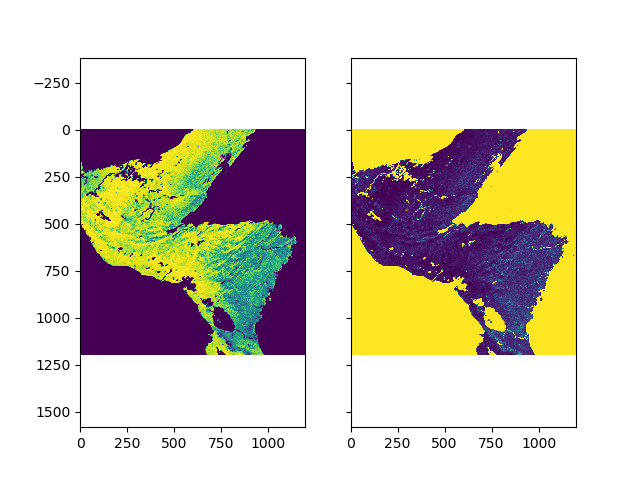

In [65]:
import matplotlib.pyplot as plt

# Get percentage of  data available
pct_data_available = (temporal_mask.sum(axis=0) * 100.0) / _time

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.imshow(pct_data_available)
#plt.colorbar()

ax2.imshow(max_gap_length)
#plt.colorbar()

#plt.imshow(mask[6].sum(axis=0))
plt.show()

<IPython.core.display.Javascript object>


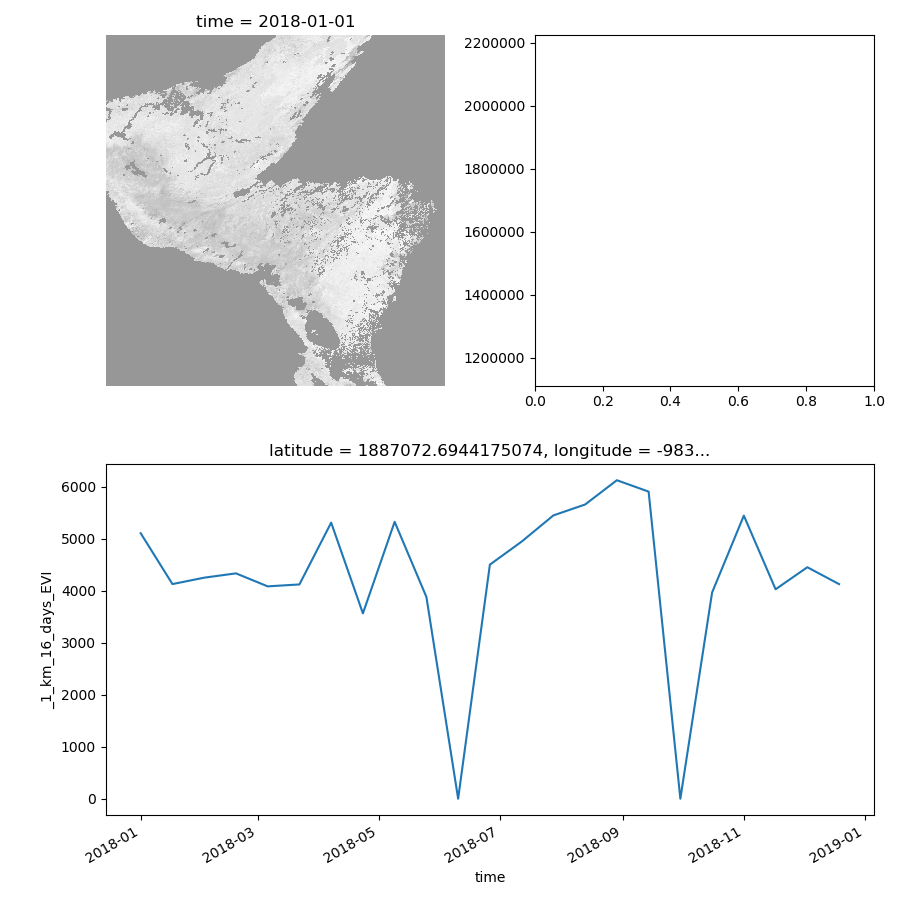

In [63]:
# Time series of EVI
p = PlotTimeSeries()
#p.plot(ts.data._1_km_16_days_EVI, ts.qa.qa_1_km_16_days_VI_Quality.Land_Water_Mask)
p.plot(ts.data.data_vars['_1_km_16_days_EVI'] * temporal_mask,
       ts.qa.qa_1_km_16_days_VI_Quality.Land_Water_Mask)